Column names: Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       118
           1       0.92      0.71      0.80        17
           2       0.98      1.00      0.99       361
           3       0.78      0.91      0.84        23

    accuracy                           0.97       519
   macro avg       0.91      0.88      0.89       519
weighted avg       0.97      0.97      0.96       519


Confusion Matrix:
 [[108   1   7   2]
 [  1  12   0   4]
 [  1   0 360   0]
 [  2   0   0  21]]


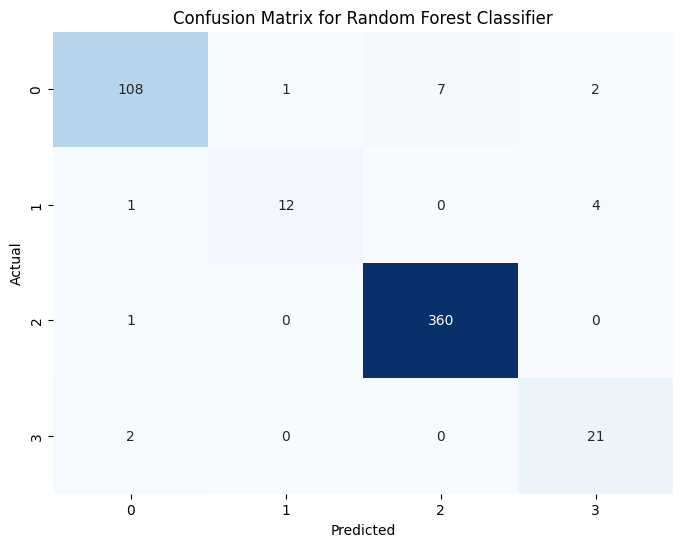

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('car_evaluation.csv')

# Inspect column names to find the correct name for the target column
print("Column names:", data.columns)

# Assuming the target column might be 'class' or similar, adjust this based on actual column n
# Replace 'class' with the correct column name if different (e.g., 'safety')
target_column = 'class' if 'class' in data.columns else 'safety'

# Encode categorical variables
label_encoders = {}
for column in data.columns:
 le = LabelEncoder()
 data[column] = le.fit_transform(data[column])
 label_encoders [column] = le # Store encoders in case of inverse transformation later

# Define features (X) and target (y)
X = data.drop(columns=["unacc"]) # Features
y = data["unacc"] # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier (random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print (f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize =(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()